In [2]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#I made this in google colab and so imported the file via google drive
#I changed this in the file so that it can run without my drive
#
#from google.colab import drive
#drive.mount('/content/drive')





Mounted at /content/drive


In [ ]:
#this code block is not necessary

import pickle

with open('/content/drive/My Drive/966FinalProj/data/scores.pkl', 'rb') as f:
    data = pickle.load(f)

data

In [4]:
#accessing spreadsheet with data 


#with open('/content/drive/My Drive/966Project/sampled_responses.csv','r') as readfile:  
with open('sampled_respnses.csv','r') as readfile:
  df = pd.read_csv(readfile)

df = df.iloc[: , 1:]
df = df.drop(columns = ['RecordID', 'ExtendedSessionID', 'SessionID', 'ScenarioOrder','ScenarioType','DefaultChoice','NonDefaultChoice','DefaultChoiceIsOmission','DurationInSec'])

signal_0 = df["CrossingSignal0"].to_numpy()
signal_1 = df["CrossingSignal1"].to_numpy()

law_abiding_0 = -abs(signal_0-1)+1
law_abiding_0_df = pd.DataFrame(data=law_abiding_0, columns=["Law_Abiding_0"])

law_abiding_1 = -abs(signal_1-1)+1
law_abiding_1_df = pd.DataFrame(data=law_abiding_1, columns=["Law_Abiding_1"])

law_violating_0 = np.sign(signal_0-2)+1
law_violating_0_df = pd.DataFrame(data=law_violating_0, columns=["Law_Violating_0"])

law_violating_1 = np.sign(signal_1-2)+1
law_violating_1_df = pd.DataFrame(data=law_violating_1, columns=["Law_Violating_0"])


df["Law_Abiding_0"] = law_abiding_0_df
df["Law_Abiding_1"] = law_abiding_1_df
df["Law_Violating_0"] = law_violating_0_df
df["Law_Violating_1"] = law_violating_1_df


df = df[['UserID',
         "Man0",
         "Woman0",
         "Boy0",
         "Girl0",
         "Old Man0",
         "Old Woman0",
         "Stroller0",
         "Pregnant0",
         "Large Man0",
         "Large Woman0",
         "Male Athlete0",
         "Female Athlete0",
         "Male Executive0",
         "Female Executive0",
         "Male Doctor0",
         "Female Doctor0",
         "Homeless0",
         "Criminal0",
         "Dog0",
         "Cat0",
         "Barrier0",
         "Law_Abiding_0",
         "Law_Violating_0",
         "Man1",
         "Woman1",
         "Boy1",
         "Girl1",
         "Old Man1",
         "Old Woman1",
         "Stroller1",
         "Pregnant1",
         "Large Man1",
         "Large Woman1",
         "Male Athlete1",
         "Female Athlete1",
         "Male Executive1",
         "Female Executive1",
         "Male Doctor1",
         "Female Doctor1",
         "Homeless1",
         "Criminal1",
         "Dog1",
         "Cat1",
         "Barrier1",
         "Law_Abiding_1",
         "Law_Violating_1",
         "UserCountry3",
         "ChosenOucome"]]
df

,UserID,Man0,Woman0,Boy0,Girl0,Old Man0,Old Woman0,Stroller0,Pregnant0,Large Man0,Large Woman0,Male Athlete0,Female Athlete0,Male Executive0,Female Executive0,Male Doctor0,Female Doctor0,Homeless0,Criminal0,Dog0,Cat0,Barrier0,Law_Abiding_0,Law_Violating_0,Man1,Woman1,Boy1,Girl1,Old Man1,Old Woman1,Stroller1,Pregnant1,Large Man1,Large Woman1,Male Athlete1,Female Athlete1,Male Executive1,Female Executive1,Male Doctor1,Female Doctor1,Homeless1,Criminal1,Dog1,Cat1,Barrier1,Law_Abiding_1,Law_Violating_1,UserCountry3,ChosenOucome
0,3.784040e+15,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,1,0,PHL,0
1,3.784040e+15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,PHL,0
2,3.784040e+15,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,PHL,1
3,3.784040e+15,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PHL,1
4,3.784040e+15,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PHL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129962,4.837600e+15,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,POL,1
129963,4.837600e+15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,1,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,POL,1
129964,4.837600e+15,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,POL,1
129965,4.837600e+15,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,POL,0


In [5]:
#isolating users from Denmark with exactly 13 responses per individual

temp_den_df = df[df['UserCountry3'] == 'DNK']

#print(temp_den_df)

den_df = temp_den_df.iloc[1:14]
i = 14

#print(den_df)

while i < 1306-12:
  if temp_den_df.iloc[i]["UserID"] == temp_den_df.iloc[i+12]["UserID"]:
    den_df = pd.concat([den_df, temp_den_df.iloc[i:i+13]])
    i+=13
  else:
    b=False
    while not b:
      b = temp_den_df.iloc[i]["UserID"] != temp_den_df.iloc[i+1]["UserID"]
      print(i)
      i+=1
den_df



66
314
380
433
785
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1253


,UserID,Man0,Woman0,Boy0,Girl0,Old Man0,Old Woman0,Stroller0,Pregnant0,Large Man0,Large Woman0,Male Athlete0,Female Athlete0,Male Executive0,Female Executive0,Male Doctor0,Female Doctor0,Homeless0,Criminal0,Dog0,Cat0,Barrier0,Law_Abiding_0,Law_Violating_0,Man1,Woman1,Boy1,Girl1,Old Man1,Old Woman1,Stroller1,Pregnant1,Large Man1,Large Woman1,Male Athlete1,Female Athlete1,Male Executive1,Female Executive1,Male Doctor1,Female Doctor1,Homeless1,Criminal1,Dog1,Cat1,Barrier1,Law_Abiding_1,Law_Violating_1,UserCountry3,ChosenOucome
2287,1.645610e+15,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,DNK,0
2288,1.645610e+15,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,DNK,0
2289,1.645610e+15,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,DNK,0
2290,1.645610e+15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,DNK,0
2291,1.645610e+15,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,DNK,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127104,2.424090e+15,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,1,DNK,1
127105,2.424090e+15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,DNK,1
127106,2.424090e+15,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,DNK,0
127107,2.424090e+15,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,DNK,0


In [6]:
#choosing I individuals to analyze

i = 0
j = 0*13

theta0list = []
theta1list = []
def transform_scenarios(df, j):
  Total_0_t = np.zeros((24,1))
  Total_1_t = np.zeros((24,1))

  for t in range(13):
    outcome = df.iloc[j+t]["ChosenOucome"]
    #print(df.iloc[j+t])
    theta_t = df.iloc[j+t][1:47].to_numpy()
    theta_0_t = np.concatenate(([outcome], theta_t[0:23])).reshape(24,1)
    theta_1_t = np.concatenate(([outcome], theta_t[23:46])).reshape(24,1)
    Total_0_t = np.concatenate((Total_0_t, theta_0_t), axis=1)
    Total_1_t = np.concatenate((Total_1_t, theta_1_t), axis=1)
    #print("a", theta_0_t)
    #print("b", Total_0_t)


  Total_0_t = Total_0_t[:,1:14]
  Total_1_t = Total_1_t[:,1:14]
  #print(j, Total_0_t)

  return Total_0_t, Total_1_t
I=3
while i<I: #i < 20:
  theta0, theta1 = transform_scenarios(den_df, j)
  theta0list.append(theta0)
  theta1list.append(theta1)
  j+=13
  i+=1

Theta_0 = np.concatenate((theta0list), axis=1)
Theta_1 = np.concatenate((theta1list), axis=1)



In [7]:
from theano.tensor import *
import math


data_0, data_1 = Theta_0, Theta_1

with pm.Model() as model:
  N=13*I
  # prior over the covariance matrix:
  def sigmoid(utility):
    return 1/(1+exp(-utility))

  def transform(d0,d1,w_i,A):
    print(w_i)
    f0 = A@d0.astype("float64")
    f1 = A@d1.astype("float64")
    u0 = w_i@f0
    u1 = w_i@f1
    U = np.add(u1,-u0)
    return sigmoid(U)


  sig_w = pm.LKJCholeskyCov("packed_L", n=18, eta=2.0, sd_dist=pm.Exponential.dist(1.0))
  decomposition = pm.expand_packed_triangular(18, sig_w, lower=True)

  # prior over the group weights:
  w_g = pm.MvNormal("w_g", mu=np.zeros((1,18)), chol=decomposition, shape = (1,18))
  # parameterization for the weights:
  w_i = pm.MvNormal("w_i", mu=w_g, chol=decomposition, shape = (1,18))

  A = np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0],
                    [0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0],
                    [0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])
    
  
  likelihood = pm.Bernoulli('likelihood', p = transform(data_0,data_1,w_i,A), observed = den_df.iloc[:N]["ChosenOucome"].to_numpy().reshape(N,1))

                            #p = transform(data_0,data_1,w_i,A).reshape(13,N), shape = (13,N), observed =(data_0,data_1))

  
  with model:
    step = pm.Metropolis()
    trace = pm.sample(1000, step, chains=1)


w_i ~ MvNormal


AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (3). Passed array should have shape (chains, draws, *shape)
  UserWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bf31deb10>,
      dtype=object)

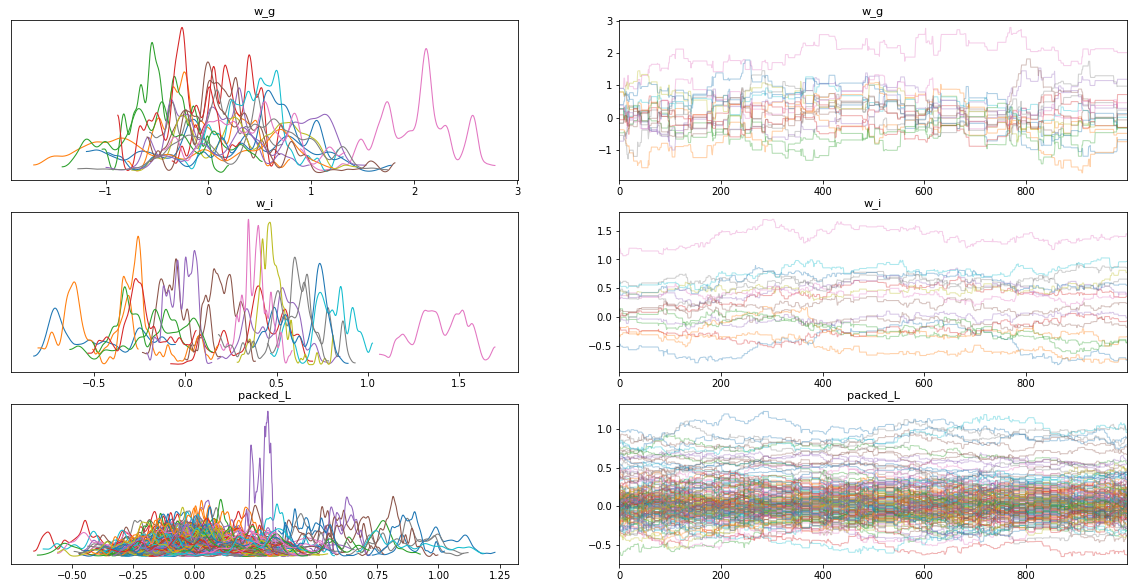

In [103]:
pm.traceplot(trace, figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/arviz/data/base.py:221: UserWarning: More chains (1000) than draws (1). Passed array should have shape (chains, draws, *shape)
  UserWarning,


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f3bf1e89250>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f3bf3bf3510>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f3bf3c3aed0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f3bf3c22390>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f3bf3c22650>}

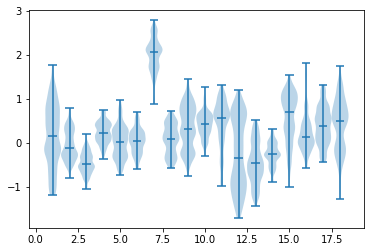

In [104]:
import arviz as az

az.summary(trace['w_g'], kind="stats")
plt.violinplot(trace['w_g'].mean(axis=1), showmedians=True, widths=1  ) 